In [1]:
# install required libraries
# !pip install numpy
# !pip install pandas

# import libraries
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

## Data Cleaning

We are going to be using the ANES data set, which contains survey responses regarding political attitudes from before and after the 2016 presidential election.

In [2]:
anes_raw = pd.read_csv('../data/anes/ANES_legalst123.csv')
anes_raw.head()

,V160101f,V160102f,V161024x,V161140x,V161158x,V161188,V161192,V161194x,V161198,V161204x,...,V162362,V162363,V162364,V162365,V162366,V162367,V162368,V162369,V168112,V168113
0,0.887,0.927,3,5,7,2,3,4,7,4,...,4,3,4,4,4,-4,3,4,4,4
1,1.160,1.084,3,3,6,1,1,1,7,6,...,3,3,1,4,1,-4,3,4,1,2
2,0.416,0.398,1,3,3,2,1,7,7,4,...,2,3,1,2,1,-4,2,4,4,3
3,0.385,0.418,4,3,5,1,3,4,5,6,...,3,3,2,3,2,-4,4,4,2,2
4,0.693,0.726,3,3,3,1,3,6,7,7,...,2,4,3,2,3,-4,2,5,4,3


### Renaming Columns

Wow that's a lot of data! You may have noticed that our column names are not very informative. This means we need to clean our data before we can use it.

First, let's rename our columns so that it is more clear what kind of information they contain. To do this we can use the `rename` method for `pandas` dataframes. You can find the documentation for this method [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html).

For more basic statistics and more information about what these column names mean, please refer to the codebook.

In [3]:
# Dictionary to pass to `rename` mapping the old name to the new name.
# Feel free to look through this to see the kind of attitudes this survey aimed to capture.
# If in the future you'd like to refer go back to the codebook for more information about what a column name
# means, you can use this as a reference to find the column ID in the codebook.
new_names = {
    "V160101f": "pre_election_weight_ftf",
    "V160102f": "post_election_weight_ftf",
    "V161024x": "pre_voting_status",
    "V161140x": "pre_economy_last_year",
    "V161158x": "pre_party_id",
    "V161188": "pre_gun_access_importance",
    "V161192": "pre_unauthorized_immigrants",
    "V161194x": "pre_birthright_citizenship",
    "V161198": "pre_govt_assist_to_blacks",
    "V161204x": "pre_affirmative_action",
    "V161208": "pre_crime_budget",
    "V161209": "pre_welfare_budget",
    "V161210": "pre_childcare_budget",
    "V161211": "pre_aid_to_poor_budget",
    "V161212": "pre_environment_budget",
    "V161213x": "pre_troops_to_fight_isis",
    "V161214x": "pre_syrian_refugees",
    "V161215": "pre_trust_washington",
    "V161216": "pre_interests_of_few_or_many",
    "V161217": "pre_govt_waste_tax_money",
    "V161218": "pre_govt_corruption",
    "V161219": "pre_are_people_trustworthy",
    "V161220": "pre_govt_attention",
    "V161221": "pre_global_warming",
    "V161225x": "pre_govt_action_rising_temp",
    "V161227x": "pre_govt_services_same_sex_couples",
    "V161228x": "pre_transgender_policy",
    "V161229x": "pre_lgbt_protection_laws",
    "V161231": "pre_gay_marriage",
    "V161232": "pre_abortion",
    "V161233x": "pre_death_penalty",
    "V161235x": "pre_economy_since_2008",
    "V161236": "pre_angry_at_obama",
    "V161237": "pre_proud_of_obama",
    "V161241": "pre_religion_importance",
    "V161242": "pre_religion_provides_guidance",
    "V161243": "pre_bible_word_of_got_or_men",
    "V161244": "pre_attend_religions_services",
    "V161245": "pre_how_often_religious_services",
    "V161267x": "pre_age_group",
    "V161268": "pre_marital_status",
    "V161270": "pre_education_level",
    "V161276x": "pre_occupation_status",
    "V161310x": "pre_race",
    "V161316": "pre_place_of_birth",
    "V161324": "pre_children_in_household",
    "V161326": "pre_home_internet_use",
    "V161327": "pre_cell_or_landline",
    "V161331x": "pre_length_in_current_coummunity",
    "V161334": "pre_home_ownership",
    "V161340": "pre_unexpired_passport",
    "V161342": "pre_gender",
    "V161343": "pre_roughing_up_protestors",
    "V161344": "pre_justified_use_of_violence",
    "V161345": "pre_feminist",
    "V161361x": "pre_income",
    "V161362": "pre_political_correctness",
    "V161496": "pre_gun_ownership",
    "V161507": "pre_sexist_remarks",
    "V161508": "pre_women_appreciating_men",
    "V161509": "pre_women_power_over_men",
    "V161510": "pre_men_on_leash",
    "V161511": "pre_sexual_orientation",
    "V161515": "pre_party_representation_house",
    "V161516": "pre_party_representation_senate",
    "V161522": "pre_general_satisfaction",
    "V162010": "pre_talk_about_voting",
    "V162011": "pre_political_meetings",
    "V162012": "pre_political_visibility",
    "V162013": "pre_work_for_party",
    "V162014": "pre_monetary_contribution_to_party",
    "V162014a": "pre_party_contributed_to",
    "V162016": "post_monetary_contribution_to_party",
    "V162016a": "post_party_contributed_to",
    "V162018a": "post_protest_participation",
    "V162018b": "post_signed_petition",
    "V162018c": "post_give_money_to_relig_org",
    "V162018d": "post_give_money_to_soc_pol_org",
    "V162018e": "post_social_media_political_message",
    "V162019": "post_contact_representative",
    "V162030x": "post_party_registration",
    "V162031x": "post_voted_in_2016",
    "V162062x": "post_pres_vote_admin",
    "V162066x": "post_strength_of_vote",
    "V162067x": "post_house_vote",
    "V162068x": "post_senate_vote",
    "V162069x": "post_governor_vote",
    "V162078": "post_clinton_rating",
    "V162079": "post_trump_rating",
    "V162095": "post_christian_fundamentalist_rating",
    "V162096": "post_feminist_rating",
    "V162097": "post_liberal_rating",
    "V162098": "post_labor_unions_rating",
    "V162099": "post_poor_people_rating",
    "V162100": "post_big_business_rating",
    "V162101": "post_conservative_rating",
    "V162102": "post_supreme_court_rating",
    "V162103": "post_lgbt_rating",
    "V162104": "post_congress_rating",
    "V162105": "post_rich_people_rating",
    "V162106": "post_muslims_rating",
    "V162107": "post_christians_rating",
    "V162108": "post_jews_rating",
    "V162109": "post_tea_party_rating",
    "V162110": "post_police_rating",
    "V162111": "post_transgender_rating",
    "V162112": "post_scientists_rating",
    "V162113": "post_blm_rating",
    "V162123": "post_world_like_america",
    "V162125x": "post_american_flag",
    "V162136x": "post_economic_mobility",
    "V162147x": "post_vaccines",
    "V162150x": "post_gender_income_equality",
    "V162157": "post_immigration_levels",
    "V162158": "post_immigration_takes_away_jobs",
    "V162160": "post_worry_terrorist_attack",
    "V162168": "post_need_free_thinkers",
    "V162169": "post_rotten_apples",
    "V162170": "post_strong_leader",
    "V162171": "post_liberal_conservative",
    "V162174a": "post_discuss_politics",
    "V162178": "post_wiretaps",
    "V162179": "post_marijuana",
    "V162180x": "post_bank_regulation",
    "V162188x": "post_trump_towards_women",
    "V162191a": "post_which_is_conservative_party",
    "V162193x": "post_healthcare_spending",
    "V162207": "post_attitude_toward_changing_world",
    "V162209": "post_tolerate_other_morals",
    "V162210": "post_trad_values",
    "V162211": "post_no_favors_for_blacks",
    "V162212": "post_slavery_impact",
    "V162213": "post_blacks_deserve_more",
    "V162214": "post_blacks_should_try_harder",
    "V162229x": "post_bond_with_child",
    "V162230x": "post_man_works",
    "V162231x": "post_women_discrimination",
    "V162238x": "post_preferential_hiring",
    "V162239": "post_child_indep_respect",
    "V162240": "post_child_curiosity_manners",
    "V162241": "post_child_obedience_self_reliance",
    "V162242": "post_child_considerate_behave",
    "V162254": "post_govt_knew_9_11",
    "V162255x": "post_obama_muslim",
    "V162262": "post_politicians_are_problem",
    "V162263": "post_strong_leader_bend_rules",
    "V162266": "post_minorities_should_adapt",
    "V162268": "post_immigrants_good_for_economy",
    "V162269": "post_immigrants_harm_culture",
    "V162270": "post_immigrants_increase_crime",
    "V162271": "post_truly_american_us_born",
    "V162272": "post_truly_american_us_ancestry",
    "V162273": "post_truly_american_speak_english",
    "V162274": "post_truly_american_follow_trad",
    "V162290": "post_satisfied_with_democracy",
    "V162310": "post_asian_american_feeling_therm",
    "V162311": "post_hispanics_feeling_therm",
    "V162312": "post_blacks_feeling_therm",
    "V162313": "post_illegal_imm_feeling_therm",
    "V162314": "post_whites_feeling_therm",
    "V162316": "post_whites_work_together",
    "V162317": "post_hiring_minorities",
    "V162318": "post_govt_treatment_whites_blacks",
    "V162319": "post_govt_treatment_degree",
    "V162320": "post_police_treatment_whites_blacks",
    "V162321": "post_police_treatment_degree",
    "V162322": "post_white_influence",
    "V162323": "post_black_influence",
    "V162324": "post_hispanic_influence",
    "V162325": "post_asian_influence",
    "V162345": "post_whites_hardworking",
    "V162346": "post_blacks_hardworking",
    "V162347": "post_hispanics_hardworking",
    "V162348": "post_asians_hardworking",
    "V162349": "post_whites_violent",
    "V162350": "post_blacks_violent",
    "V162351": "post_hispanics_violent",
    "V162352": "post_asians_violent",
    "V162353": "post_muslims_violent",
    "V162354": "post_christians_violent",
    "V162355": "post_muslims_patriotic",
    "V162356": "post_christians_patriotic",
    "V162357": "post_discrim_blacks",
    "V162358": "post_discrim_hispanics",
    "V162359": "post_discrim_asians",
    "V162360": "post_discrim_whites",
    "V162361": "post_discrim_lgbt",
    "V162362": "post_discrim_women",
    "V162363": "post_discrim_men",
    "V162364": "post_discrim_muslim",
    "V162365": "post_discrim_christian",
    "V162366": "post_discrim_transgender",
    "V162367": "post_discrim_personal",
    "V162368": "post_skintone",
    "V162369": "post_discrim_skintone",
    "V168112": "post_inform_level",
    "V168113": "post_intelligence"
}

In [4]:
anes = anes_raw.rename(index = str, columns=new_names)
anes.head()

,pre_election_weight_ftf,post_election_weight_ftf,pre_voting_status,pre_economy_last_year,pre_party_id,pre_gun_access_importance,pre_unauthorized_immigrants,pre_birthright_citizenship,pre_govt_assist_to_blacks,pre_affirmative_action,...,post_discrim_women,post_discrim_men,post_discrim_muslim,post_discrim_christian,post_discrim_transgender,post_discrim_personal,post_skintone,post_discrim_skintone,post_inform_level,post_intelligence
0,0.887,0.927,3,5,7,2,3,4,7,4,...,4,3,4,4,4,-4,3,4,4,4
1,1.160,1.084,3,3,6,1,1,1,7,6,...,3,3,1,4,1,-4,3,4,1,2
2,0.416,0.398,1,3,3,2,1,7,7,4,...,2,3,1,2,1,-4,2,4,4,3
3,0.385,0.418,4,3,5,1,3,4,5,6,...,3,3,2,3,2,-4,4,4,2,2
4,0.693,0.726,3,3,3,1,3,6,7,7,...,2,4,3,2,3,-4,2,5,4,3


### Null Values

Our data also contain a lot of missing values. The creators of the survey wanted a way to encode different reasons why a value is missing by assigning different reasons to different negative numbers. However, for our purposes, we would just like to know if a value is missing, so we can just replace these with `np.NaN`. `NaN` stands for "not a number," and is just a handy way for us to indicate missing values.

In [5]:
anes[anes < 0] = np.nan
anes[anes > 100] = np.nan

## Groupby and Summary Statistics

With data this large, it's often difficult to know where to start looking. It's often handy to start by looking at individual columns and getting some basic information about how different variables interact. Groupby operations generally follow a similar format. First `groupby` your category(s) of interest, then select columns to compare, and finally apply `agg`regator function(s). Here's are some examples of what this looks like:

In [6]:
# First, we need to change the values from the survey data from numbers into 
# more easily understandable information. Here is an example of how you can do
# this using the pd.Series.map function. You will need to refer to the 
# codebook to find out what the values mean. If you need to change the values
# of any other columns, you can use this function.
def change_values(column, new_values):
    anes[column] = anes[column].map(new_values, na_action="ignore")
    
parties = {
    1.0: "dem",
    2.0: "rep",
    3.0: "indep",
    4.0: "other"
}
change_values("post_party_registration", parties)

In [7]:
# Grouping by a single column, then performing multiple agg functions on multiple columns
demographics = anes.groupby("post_party_registration")["post_whites_violent",
                                                       "post_blacks_violent",
                                                       "post_muslims_violent",
                                                       "post_christians_violent"].agg(["mean", "std"])
demographics

post_whites_violent           post_blacks_violent  \
                                       mean       std                mean   
post_party_registration                                                     
dem                                3.612219  1.452709            3.987562   
other                              3.369412  1.259869            4.162353   
rep                                2.927242  1.155584            4.384095   

                                  post_muslims_violent            \
                              std                 mean       std   
post_party_registration                                            
dem                      1.388386             3.612500  1.441333   
other                    1.292027             3.966981  1.350543   
rep                      1.328827             4.424448  1.533020   

                        post_christians_violent            
                                           mean       std  
post_party_registration                                    
dem                                    3.053549  1.457929  
other                                  2.938967  1.431094  
rep                                    2.334459  1.186341

From this simple groupby, we can see that the different political parties, on average, do have different attitudes about different racial and religious groups.

In [8]:
# Grouping by multiple columns. Here, the selected column is a dummy column that
# I know contains no NA values so that our aggregator function will count the
# full size of each group.

support_marijuana = {
    1.0: "support",
    2.0: "oppose",
    3.0: "neither"
}
change_values("post_marijuana", support_marijuana)

party_by_race = anes.groupby(["post_party_registration", "post_marijuana"])["pre_voting_status"].agg(['count'])
party_by_race

count
post_party_registration post_marijuana       
dem                     neither           187
                        oppose            196
                        support           442
other                   neither           105
                        oppose            113
                        support           217
rep                     neither           143
                        oppose            264
                        support           192

From this table, we can see that different parties do have generally different opinions regarding the legalization of marijuana. 

As you can see, you can group by multiple columns, select multiple columns to aggregate on, and even use multiple aggregator functions. More information can be found in the documentation for [`.groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) and [`.agg`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.agg.html).

Now see if you can use these methods to do your own groupby operation on how the different parties viewed crime spending before the election. Refer back to the dictionary above if you are having trouble finding the name of the column you need. You will need to change the values in the column in order to have easily interpretable results.

In [9]:
# EXAMPLE
crime = {
    1.0: "increase",
    2.0: "decrease",
    3.0: "same"
}
change_values("pre_crime_budget", crime)

anes.groupby(["post_party_registration", "pre_crime_budget"])["pre_voting_status"].agg(["count"])

count
post_party_registration pre_crime_budget       
dem                     decrease             89
                        increase            585
                        same                285
other                   decrease             37
                        increase            286
                        same                175
rep                     decrease             54
                        increase            446
                        same                201

## Visualizations

### Histograms

Histograms are a nifty way to display quantitative information. The x-axis is typically a quantitative variable of interest, and the y-axis is generally a frequency. Plot a histogram of the losses, and then experiment with the bin sizes.

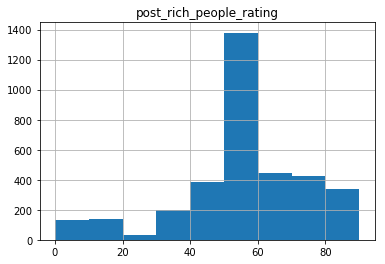

In [10]:
anes.hist('post_rich_people_rating', bins=range(0,100,10));

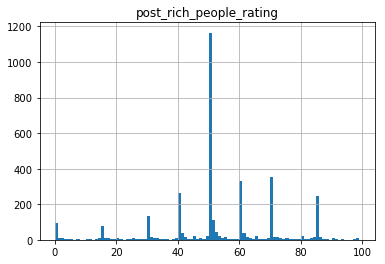

In [11]:
anes.hist('post_rich_people_rating', bins=range(0,100,1));

#### Question 1: Histograms

What happens as you increase the number of bins to 100? Does having too many bins hinder interpretation?

As the bin number increases, bins get smaller. Since this variable is a respondent generated rating, many of the responses cluster around nonrandom values (i.e. 50/100), and we get a few very tall bars with a lot of very short bars. In this case, having fewer bins allows us to more easily interpret the data by minimizing the effect of numbers that are more likely to be chosen.

### Scatter Plots

Scatter plots are generally used to relate two variables to one another. They can be useful when trying to infer relationships between variables, visualize simple regressions, and get a general sense of the "spread" of your data. Run the following code to plot each individual's response about whether minorities should adapt to American culture against the response about whether or speaking English is required to be "truly American."

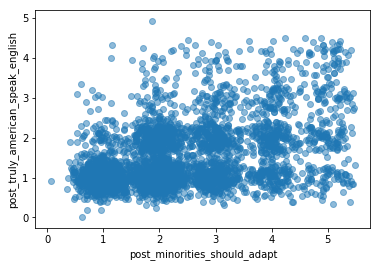

In [12]:
# Since our data is all categorical, an unaltered scatterplot would have many overlapping points
# that would mask the density of our data. In order to see all the points so we can better
# understand the distribution of our data, we can use a technique called jittering, where the
# values are all adjusted slightly by a random amount so that they no longer overlap. It's ok if
# you don't understand what this code is doing!
x = [i + np.random.normal(scale = 0.25) for i in anes["post_minorities_should_adapt"]]
y = [i + np.random.normal(scale = 0.25) for i in anes["post_truly_american_speak_english"]]

plt.scatter(x, y, alpha=0.5)
plt.xlabel("post_minorities_should_adapt")
plt.ylabel("post_truly_american_speak_english");

#### Question 2: Scatterplots

Looking at the scatterplot above, what can you infer about attitudes towards immigrants? What other variables might you want to compare to corroborate this?

In general, the majority of the clustering is around values of 0 for both variables, meaning that in general most respondents do not strongly agree with the statements. Additionally, the density of points along the x-axis is more spread out, which inc=dicates that respondents in general agree more with minorities needing to adapt to majority culture than minorities needing to speak English to be truly American. Very few respondents thought that minorities should speak English but do not need to adapt to the majority culture, while a moderate number of respondents agreed with the reverse of that.

### Boxplots

Boxplots can be used to get a general idea of the spread of your data, and are especially useful if you need to compare across more than two categories. For example, if we want to look at how different political parties perceive different groups, we can use a boxplot to easily construct these comparisons.

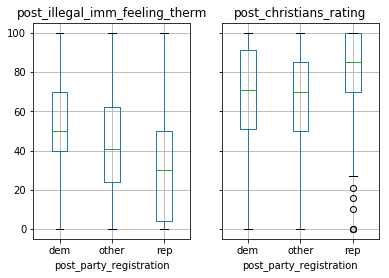

In [13]:
anes.boxplot(column=["post_illegal_imm_feeling_therm", "post_christians_rating"], by="post_party_registration")
plt.suptitle('');

#### Question 3: Boxplots

In the past few sections we have seen some ways that a lack of continuity in our data can affect the visualizations we produce. Why or why not is it ok to use data we know are discrete in these boxplots?

For these box plots, we are just getting a general idea of the preceptions the different parties have about the different groups. Even though our data is neither discrete nor nicely distributed, we can still get an idea of the differences between parties using this data.

### Practice with Plots

Practice on your own! Try plotting a visualization of some variables that you find interesting in the data, then interpret them. If you're feeling ambitious, try creating a graph that we haven't described here by looking at the [matplotlib](https://matplotlib.org/gallery/index.html) documentation!

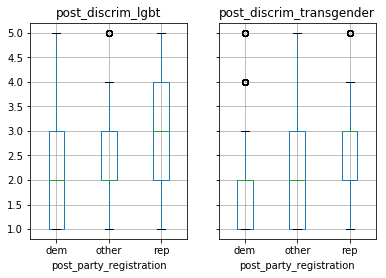

In [14]:
# EXAMPLE
anes.boxplot(column=["post_discrim_lgbt", "post_discrim_transgender"], by="post_party_registration")
plt.suptitle('');

Generally democrats and other believe that LGBT and transgender individuals are victims of discrimination to a greater degree than republicans. We can also see the effect that our discrete data have on these visualizations because in some of our bars, the mean and the end of a quartile are in the same place.

## Lopsided Distributions

With symmetrical data, we expect measures of central tendency (mean, median, and mode) to all overlap. When data are not distributed symmetrically, we often say that the data is _skewed right_ (right tailed) or _skewed left_ (left-tailed), and the mean, median, and mode typically do not overlap. 

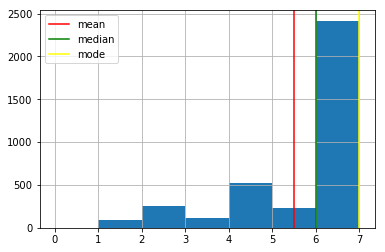

In [15]:
mobility = anes["post_economic_mobility"]
mobility.hist(bins = np.arange(8))
plt.axvline(x = mobility.mean(), color="red", label = "mean")
plt.axvline(x = mobility.median(), color="green", label = "median")
plt.axvline(x = mobility.mode()[0], color="yellow", label = "mode")
plt.legend();

Notice that this variable is skewed left, and the mean has been pulled to the left when compared to the median. Since this variable has a particularly extreme skew, the mode is at the extreme right of the graph and is not a particularly good measure of central tendency.

Sometimes, just looking at the histogram can hide trends. For instance, look at the histogram of the column asking how often the respondent felt proud of President Obama. Note that 1 = "Never" and 5 = "Always".

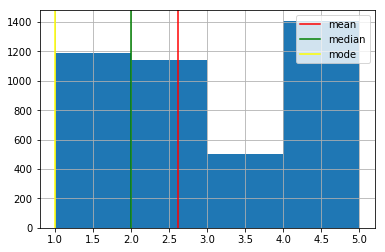

In [16]:
trump = anes["pre_proud_of_obama"]
trump.hist(bins=np.arange(1, 6))
plt.axvline(x = trump.mean(), color="red", label = "mean")
plt.axvline(x = trump.median(), color="green", label = "median")
plt.axvline(x = trump.mode()[0], color="yellow", label = "mode")
plt.legend();

There doesn't appear to be a significant trend based on this histogram. However, this particular example should make you itch to do a groupby on party affiliation to see if there are any trends we can tease out.

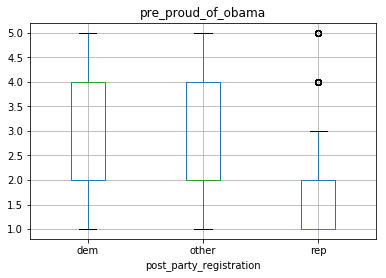

In [17]:
anes.boxplot(column="pre_proud_of_obama", by="post_party_registration")
plt.suptitle("");

The green line shows the mean ratings for the different parties. As expected, the distribution of this variable is very different when different political parties are considered separately. Plotting Democrat and Republican responses in the same histogram makes this even clearer.

/Users/monicawilkinson/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/monicawilkinson/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


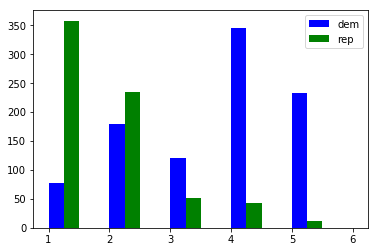

In [18]:
proud_dem = anes[anes["post_party_registration"] == "dem"]["pre_proud_of_obama"]
proud_rep = anes[anes["post_party_registration"] == "rep"]["pre_proud_of_obama"]
plt.hist([proud_dem, proud_rep], color=["blue", "green"], range=(1, 6), label = ["dem", "rep"], rwidth=1)
plt.legend();

----------

You're all done! The plotting functions we used today all have many different parameters that can be adjusted to create different looking graphs. If you have sometime, try playing around with these functions and see what kind of graphs you can make!